# Project Description

We work in the online store "Streamchik" which sells computer games all over the world. Historical data on game sales user and expert ratings, genres and platforms (for example Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

Data is available up to 2016. Let's imagine that it's December 2016 and we are planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board) an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category for example "For adults", "For younger children" or "For teenagers".

**Data Description**

- `Name` - the name of the game
- `Platform` - platform
- `Year_of_Release` - year of release
- `Genre` - game genre
- `NA_sales` - sales in North America (millions of copies sold)
- `EU_sales` - sales in Europe (millions of copies sold)
-`JP_sales` - sales in Japan (millions of copies sold)
- `Other_sales` - sales in other countries (millions of copies sold)
- `Critic_Score` - Critics score (maximum 100)
- `User_Score` - user score (maximum 10)
- `Rating` - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

`Data for 2016 may not be complete.

# Step 1. Data Overview

In [1]:
# connection of libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
# pd.options.mode.chained_assignment = None
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
# checking the number of missing values in a dataframe
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# missigs visualization
display(pd.DataFrame(round((data.isna().mean() * 100), 2), columns=['NaNs, %'])
        .style.format('{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Critic_Score,51.32
User_Score,40.09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- No duplicates found
- in the column "Year of Release" change the data type to int  
- Replace column names (bring to lower case)   
- empty values in columns "Critic_Score" , "User_Score", "Rating"

# Step 2. Data Processing

In [6]:
# convert column names to lowercase
data.columns = data.columns.str.lower()

Year_of_Release , Critic_Score , User_Score , Rating - don't change NaN's

In [7]:
# check for duplicates
print(data.duplicated().sum())

# creating a loop sets the NaN values of the "year_of_release" 
# column to the values of the same game but a different gaming platform
for i in data.loc[data['year_of_release'].isna()].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()
    

# change data type from float to int in "year_of_release" column to save RAM
data['year_of_release'] = data['year_of_release'].astype('Int64')

# creating a loop to lowercase
for i in data[['name','platform','genre']]:
    data[i] = data[i].str.lower()
    
# it was found out that "tbd" in the "User_Score" column means "to be done".
# the data was not filled in on purpose. Fill it with NaNs.
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

# change data type to float
data['user_score'] = data['user_score'].astype(float)

# replacing missing values with a new rating category
data['rating'] = data['rating'].fillna('without rating')

0


/tmp/ipykernel_178/1422540032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()


- The missings in the columns year_of_release , critic_score , user_score , rating will be left blank. Filling them out can distort the statistics.

- There are few gaps in the "name" and "genre" columns, so it was decided to leave them. They will not greatly affect further research.

Calculate the total sales in all regions and write them in a separate column

In [8]:
# Creating a new column total_sales
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,without rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,without rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,without rating,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,without rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,without rating,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,without rating,0.01


**Conclusion on data preparation:**

- It is necessary to cast the column to the correct type : `"Year of Release"`
- Also need to lowercase the columns of our table as well as the names of the columns themselves
- There are empty values in the `"rating"`, `"user_score"`, `"critic_score"` columns.
- Replace the existing empty values in the table: `"year of release"` with years from the same game only on a different platform in other cases we will decide in the preprocessing process
- There are no duplicates

# Step 3. Research data analysis

### How many games were released in different years?
### Is the data for all periods important?

- It can be seen from the chart that the number of games on game consoles and computers began to grow at a high rate from the 90s to 2008.
- Since 2008 after the mass creation of mobile applications and mobile games a sharp decline in console games is visible.

Text(0.5, 1.0, 'Number_of_games_by_year')

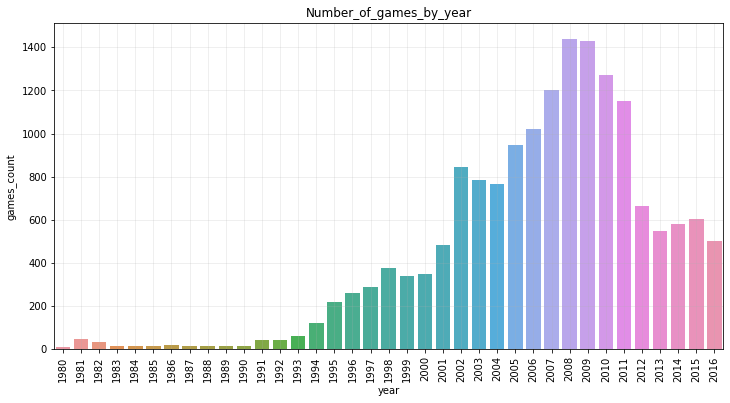

In [9]:
# creating a pivot table with games by year
games_by_years = data.pivot_table(index='year_of_release',values='name',aggfunc='count')\
                     .reset_index()
#print(games_by_years)
games_by_years = games_by_years.rename(columns={'name':'games_count','year_of_release':'year'})
plt.figure(figsize=(12,6))
ax = sb.barplot(data=games_by_years,y='games_count',x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.grid(alpha = 0.25)
plt.title("Number_of_games_by_year")

### How did sales change by platform?
Select the platforms with the highest total sales and plot the distribution by year.

### How long does it take for new platforms to appear and old ones to disappear?

   platform  sum_sales
16      ps2    1255.77
28     x360     971.42
17      ps3     939.65
25      wii     907.51
4        ds     806.12
15       ps     730.86


Text(0.5, 1.0, 'Sales by gaming platforms')

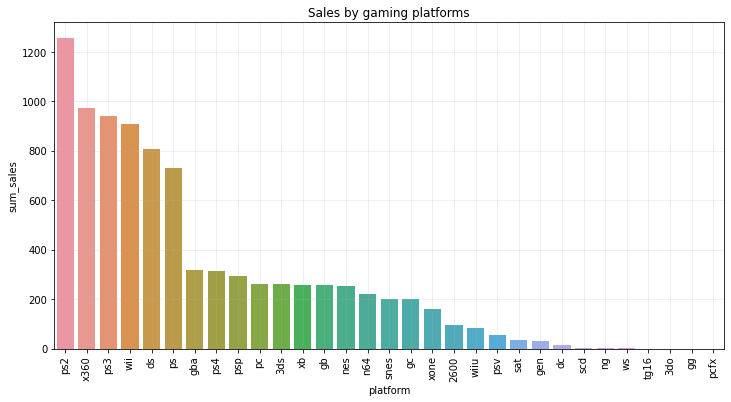

In [10]:
platform_sales = data.pivot_table(index='platform',values=['sum_sales'],aggfunc='sum').reset_index().sort_values(by='sum_sales',ascending=False)
best_platform_sales = platform_sales.loc[platform_sales['sum_sales'] >= 650]
#print(platform_sales)
print(best_platform_sales)
plt.figure(figsize=(12,6))
ax = sb.barplot(data=platform_sales,y='sum_sales',x='platform')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.grid(alpha = 0.25)
plt.title("Sales by gaming platforms")


In [11]:
# выдяляю три необходимых столбца в один датафрейм
dat = data[['year_of_release','platform','sum_sales']]
# создаю таблицу с данными продаж игр по годам
d = dat.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
d = d[['ps2','x360','ps3','wii','ds','ps']].reset_index()
# тут берем все года, где были приставки, чтобы увидеть полную картуну (1994-2016)
d = d.loc[d['year_of_release'] > 1994]
d = d.reset_index()
d.set_index('year_of_release', inplace=True)
# display(d)

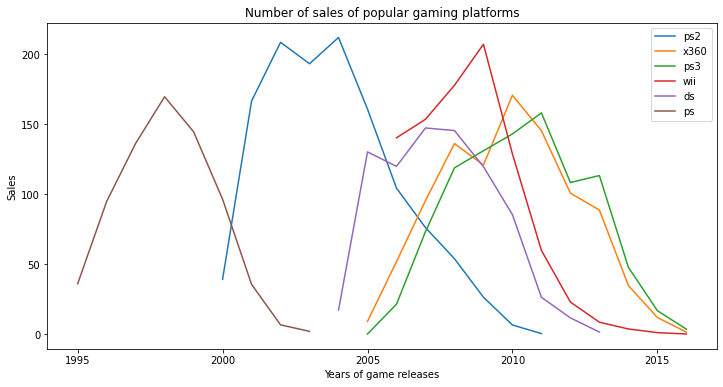

In [12]:
# all gaming platforms and their behavior over the past 10 years
plt.figure(figsize=(12,6))
plt.title('Number of sales of popular gaming platforms')
plt.xlabel('Years of game releases')
plt.ylabel('Sales')

for i in d[['ps2','x360','ps3','wii','ds','ps']]:
    sb.lineplot(data=d[i],label=i)
    plt.legend()

**Conclusion:**

- Almost all gaming platforms exist on average for 10 years;
- Top sellers are Sony Play Station and XBOX;
- The peak comes about 5 years after the release of the console;
- Nintento WII had a quick jump in 2009 and a similarly sharp dip.

### Take the data for the corresponding actual period.
- Determine the current period yourself as a result of the study of previous questions.
- The main factor - these data will help build a forecast for 2017.

In [13]:
# creating a table with a slice of data by dates (2014 - 2016)
slicee =  data.query('year_of_release >= 2014 and year_of_release <= 2016')
# slicee = data[((data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016))]

# 5 best gaming platform selection ["xone","3ds","ps4","ps3","x360"]
platform1 = slicee.pivot_table(index='platform',values=['sum_sales'],aggfunc='sum').reset_index().sort_values(by='sum_sales',ascending=False)
display(platform1)

# new slice on the best platforms
slicee =  data.query('(platform == ["ps4","xone","3ds","ps3","x360"]) and ((year_of_release >= 2014) and (year_of_release <= 2016))')
slicee = slicee.reset_index()
display(slicee)     

,platform,sum_sales
3,ps4,288.15
9,xone,140.36
0,3ds,86.68
2,ps3,68.18
8,x360,48.22
7,wiiu,42.98
1,pc,27.40
5,psv,22.40
6,wii,5.07
4,psp,0.36


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,without rating,14.63
1,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,without rating,11.68
3,77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,without rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
1142,16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,NaN,NaN,without rating,0.01
1143,16677,aikatsu stars! my special appeal,3ds,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,without rating,0.01
1144,16691,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,without rating,0.01


  platform  sum_sales
0      ps4     288.15
1     xone     140.36
2      3ds      86.68
3      ps3      68.18
4     x360      48.22


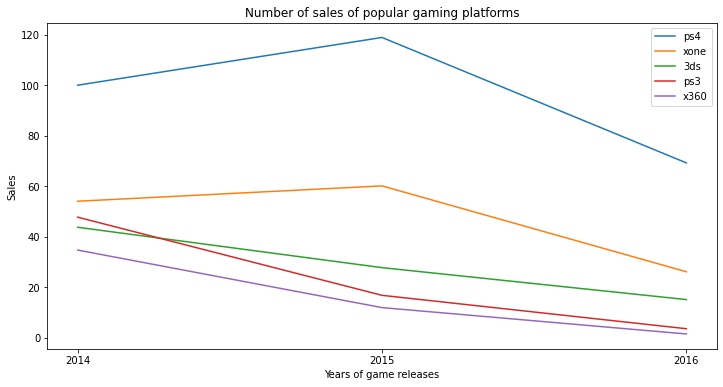

In [14]:
# return desired pivot table and display data since 2005

def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform']== i) & (data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]
    total = slicee.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total



# table by platforms and total sales. sort them in descending order and leave only the top 5.
top_5_platforms = slicee.pivot_table(index='platform',values='sum_sales',aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index()
print(top_5_platforms)

# all gaming platforms and their behavior over the past 10 years
ax = plt.figure(figsize=(12,6)).gca()
plt.title('Number of sales of popular gaming platforms')
plt.xlabel('Years of game releases')
plt.ylabel('Sales')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i in list(top_5_platforms['platform']):
    sb.lineplot(data=year_total_sale_for_platform(i,data)['sum_sales'], label=i)
    plt.legend()

**Three main stages of development:**
- growth up to 2008;
- the peak of 2008 and 2009;
- reduction of the market until 2016;
- Also most of the platforms are no longer in 2016. They will not help us in building a forecast for 2017;
- When the period is reduced only the latest generations of platforms will be considered. We will also consider only the final interval of the development of the gaming industry;
- The data was taken from 2011 to 2013. This year is the most representative.

### Plot a box-plot of global game sales by gaming platform

- Sliced data by years (2014-2016) in order to draw boxes with whiskers.
- Based on the plot it can be seen that the median is expressed differently for everyone
- Most sold by ps4 then by xone after 360 by ps3 and last by 3ds.

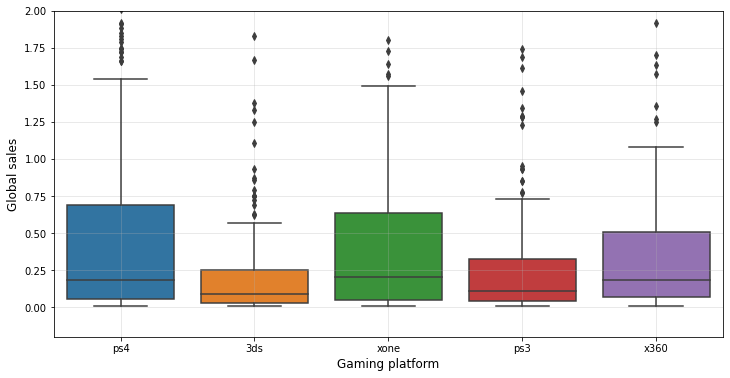

In [15]:
# plot whisker
plt.figure(figsize=(12,6))
ax = sb.boxplot(data=slicee, x='platform', y='sum_sales')
plt.xlabel('Gaming platform', fontsize=12)
plt.ylabel('Global sales',fontsize=12)
ax.set_ylim([-0.2,2])
plt.grid(alpha=0.35)

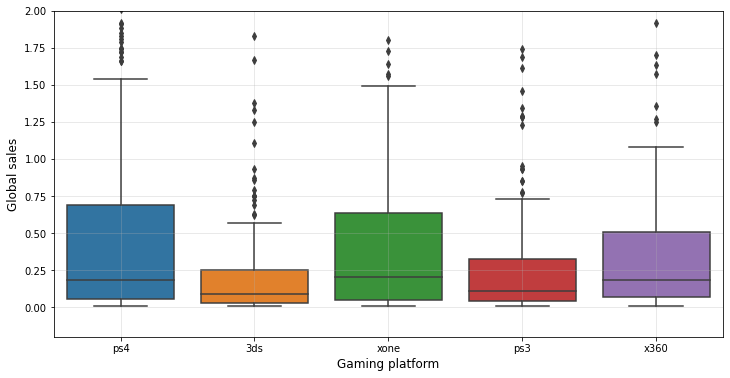

In [16]:
# plot whisker
plt.figure(figsize=(12,6))
ax = sb.boxplot(data=slicee, x='platform', y='sum_sales')
plt.xlabel('Gaming platform', fontsize=12)
plt.ylabel('Global sales',fontsize=12)
ax.set_ylim([-0.2,2])
plt.grid(alpha=0.35)

### How do user reviews and critics influence sales within one popular platform?
- Plot a scatterplot and calculate the correlation between reviews and sales;
- Make conclusions.

In [17]:
# Correlation between user ratings and sales
xbox = slicee[slicee['platform']=='x360']
#display(xbox)

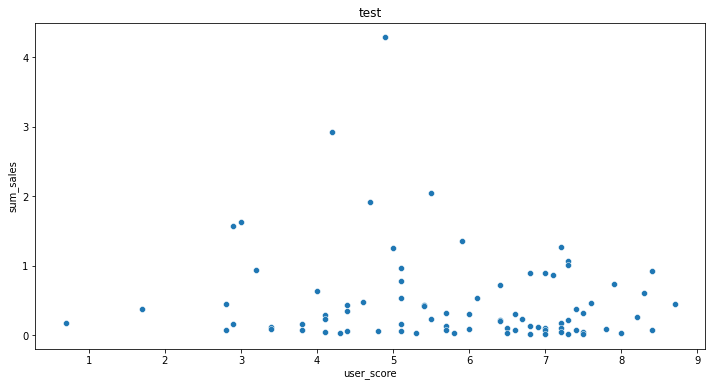

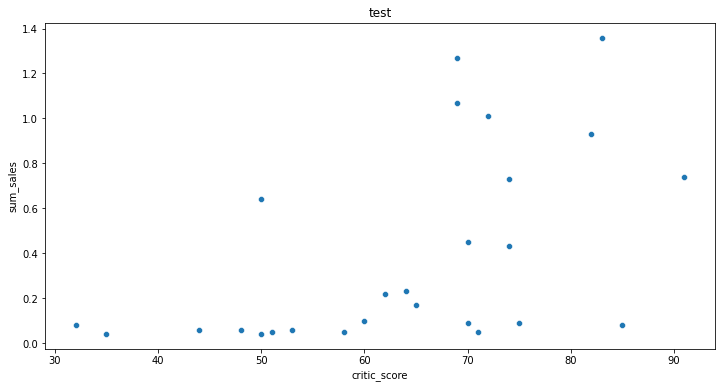

In [18]:
# Scatter plot
for i in xbox[['user_score','critic_score']]:
    plt.figure(figsize=(12,6))
    sb.scatterplot(x=i, y='sum_sales', data=xbox)
    plt.title('test')

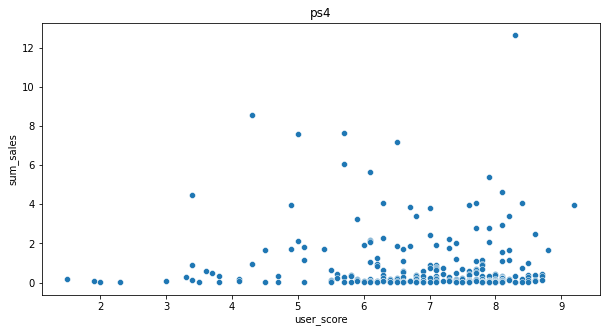

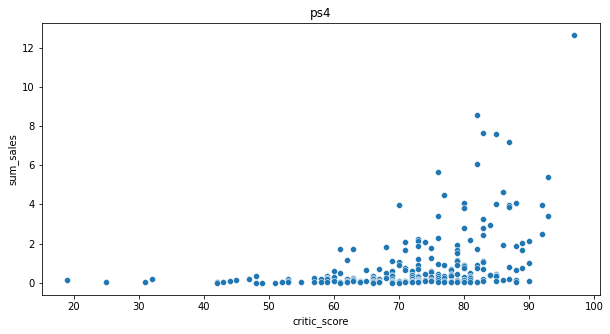

Correlation PS4 : Weak 0.40266141068104083


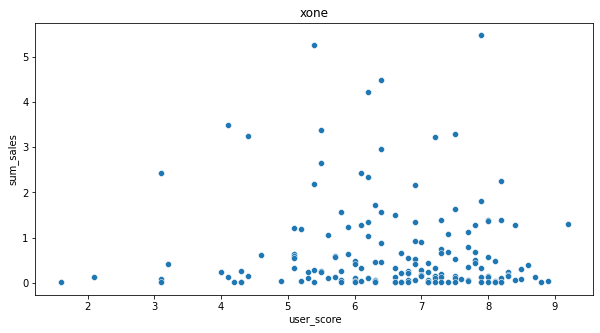

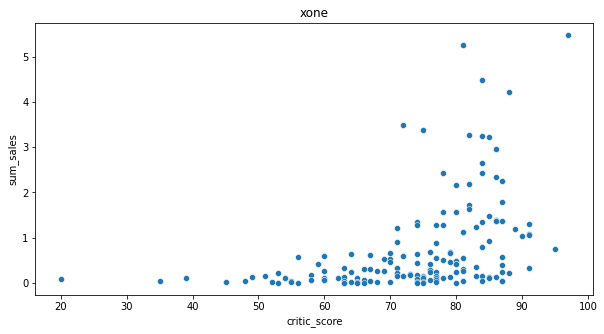

Correlation XONE : Weak 0.42867694370333226


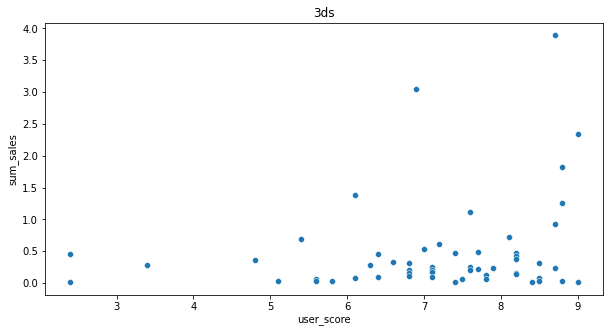

Correlation 3DS : No correlation 0.2151932718527028


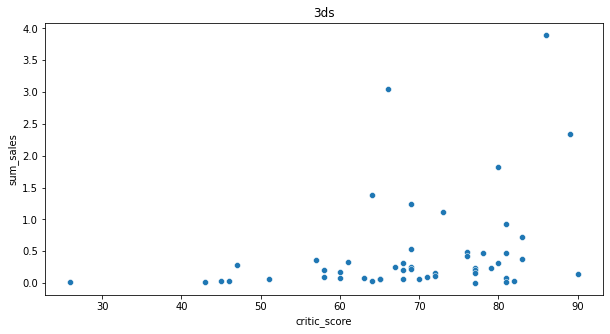

Correlation 3DS : Weak 0.314117492869051


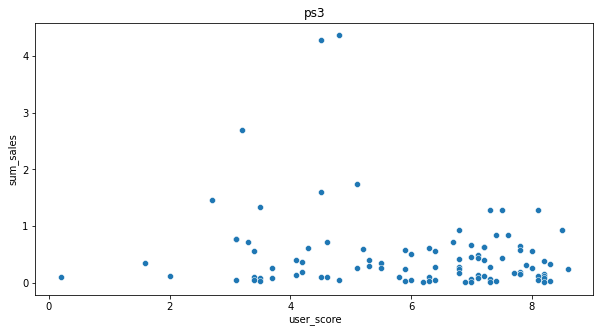

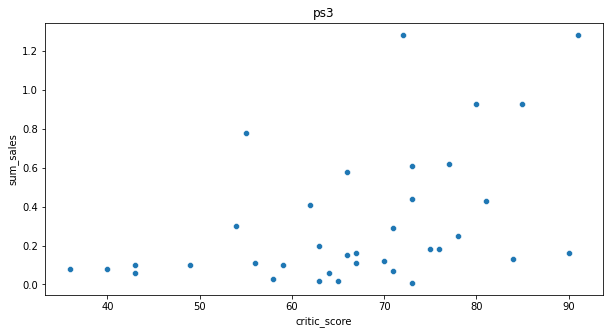

Correlation PS3 : Weak 0.44657460493190704


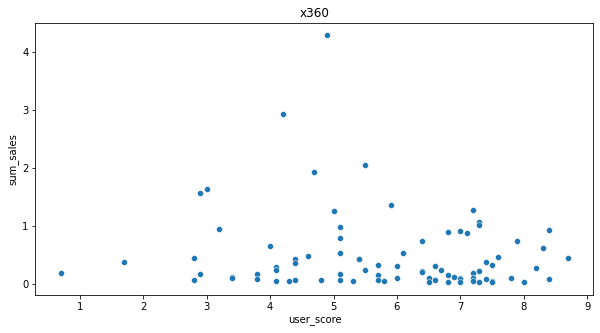

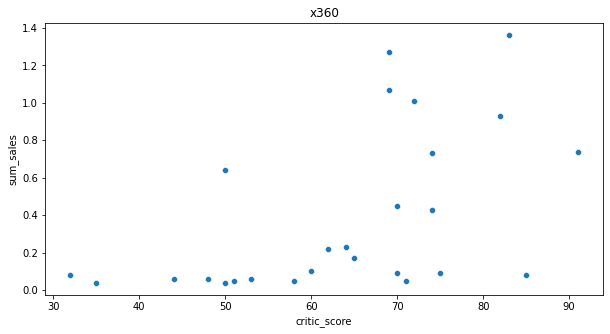

Correlation X360 : Weak 0.5257228356581523


In [19]:
for i in ["ps4","xone","3ds","ps3","x360"]:
    platform_data = slicee.loc[slicee['platform'] == i ][['user_score','critic_score','sum_sales']]
    #print(platform_data)
    for z in platform_data[['user_score','critic_score']]:
        #print(z)
        #fig, ax = plt.figure(1 ,2, figsize=(1,5))
        plt.figure(figsize=(10,5))
        sb.scatterplot(x=z, y='sum_sales', data=platform_data)
        plt.title(i)
        plt.show()
        #plt.text(12,20,'Корреляция: ' + str(round(platform_data[z].corr(platform_data['sum_sales']),3)))
        
        correl = platform_data[z].corr(platform_data['sum_sales'])
        
        if 0.3 >= correl >= 0:
            print('Correlation', i.upper(), ': No correlation', correl)
        if 0.6 >= correl > 0.3:
            print('Correlation',  i.upper(), ': Weak', correl)
        if 1 >= correl > 0.6:
            print('Correlation', i.upper(), ': High', correl)
      
    
            

- Almost all platforms have a weak correlation between user and critic ratings for sales;
- The rating of users has little effect on sales which cannot be said about the rating of critics. Buyers listen more to critics than to other users' ratings.

### What about the most profitable genres?
### Do high and low selling genres stand out?

Лучше всего в 2014 - 2016 года продаются жанры "action".В тройку входят жанры "shooter" и "спорт". "strategy" на последнем месте. 

In [20]:
genre_distribution = slicee.pivot_table(index='genre',values='sum_sales',aggfunc='sum')\
                         .sort_values(by='sum_sales',ascending=False)\
                         .reset_index()
print(genre_distribution)

           genre  sum_sales
0         action     175.17
1        shooter     159.68
2         sports     105.88
3   role-playing      88.95
4           misc      26.32
5       fighting      21.55
6         racing      19.69
7      adventure      14.47
8       platform      10.97
9     simulation       6.49
10      strategy       1.49
11        puzzle       0.93


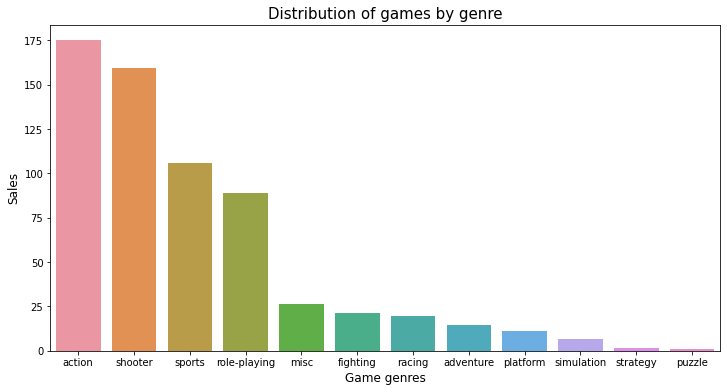

In [21]:
# which genres are leading and which remain at the bottom?
plt.figure(figsize=(12,6))
plt.title('Distribution of games by genre',fontsize=15)
sb.barplot(data=genre_distribution, x='genre', y='sum_sales')
plt.xlabel('Game genres',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.show()

Despite the fact that the `"action"` genre has the most sales the average amount of sales is higher for the `"shooter"` genre.

           genre  mean_sum_sales  count_sales
8        shooter        1.550291          103
10        sports        0.778529          136
7   role-playing        0.635357          140
2       fighting        0.439796           49
4       platform        0.421923           26
0         action        0.415095          422
6         racing        0.378654           52
3           misc        0.350933           75
9     simulation        0.282174           23
1      adventure        0.152316           95
5         puzzle        0.103333            9
11      strategy        0.093125           16


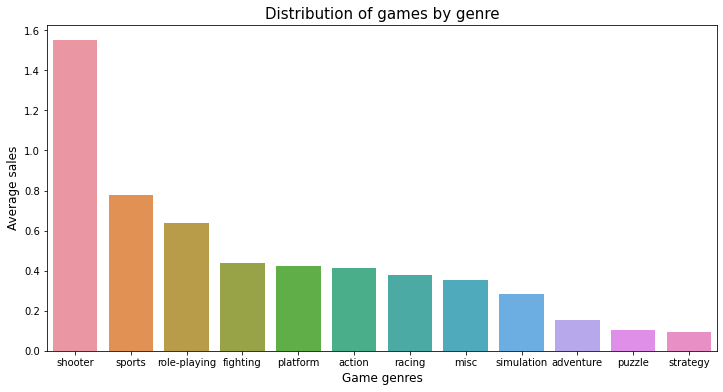

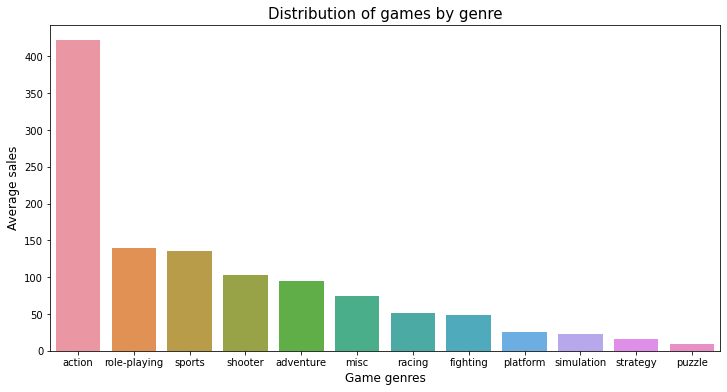

In [22]:
genre_distribution = slicee.pivot_table(index='genre',\
                                        values='sum_sales',aggfunc=['mean','count']).reset_index()

genre_distribution.columns = ['genre' ,'mean_sum_sales','count_sales']
genre_distribution = genre_distribution.sort_values(by='mean_sum_sales',ascending=False)
print(genre_distribution)

# which genres are leading and which remain at the bottom?
plt.figure(figsize=(12,6))
plt.title('Distribution of games by genre',fontsize=15)
sb.barplot(data=genre_distribution.sort_values(by='mean_sum_sales',ascending=False),\
           x='genre', y='mean_sum_sales')
plt.xlabel('Game genres',fontsize=12)
plt.ylabel('Average sales',fontsize=12)
plt.show()

# which genres are leading and which remain at the bottom?
plt.figure(figsize=(12,6))
plt.title('Distribution of games by genre',fontsize=15)
sb.barplot(data=genre_distribution.sort_values(by='count_sales',ascending=False),\
           x='genre', y='count_sales')
plt.xlabel('Game genres',fontsize=12)
plt.ylabel('Average sales',fontsize=12)
plt.show()

**Conclusion on exploratory data analysis:**

- The number of games for game consoles and computers began to grow at a high rate from the 90s until 2008;
- The most popular gaming platforms of the entire period: PS 3, Xbox 360, PS 4, Nintendo WII, DS.
- The most popular platforms for the current period: xone, 3ds, PS4, PS3, Xbox 360;
- The average life of a gaming platform is 8-9 years. The peak of sales occurs approximately 5 years after the release of the set-top box;
- Most sold games on Sony Playstation and Xbox 360;
- Nintendo Wii has become popular dramatically but was just as quickly forgotten;
- For all platforms there is a weak relationship between sales and ratings from critics and users.

The most noticeable correlation is between critics ratings and sales. This means for people the opinion of critics is more important than the opinions of other users.

# Step 4. Portrait of the user of each region

#### The most popular platforms (top 5) for the user of each region? Describe the differences in sales shares.
#### The most popular genres (top 5). Explain the difference?
#### Does the ESRB rating affect sales in a particular region?

Conclusion on drawing up a portrait of the user of each region:

- The most popular gaming platforms in north america are: `ps4, xone, x360, ps3, 3ds`. Top 5 genres in north america : `shooter, action, sports, role-playing, misc`. The ratings show that games with a rating of `M"` in the second place of the game with a rating of `"without rating"` and in the third place of the game with an `"E"` rating


- The most popular gaming platforms in Europe are: `ps4, xone, ps3, x360, 3ds`. Top 5 genres in Europe : `action, shooter, sports, role-playing, misc`. The ratings show that the most sold games are rated `"M"`, in the second place of the game with a rating of `"without rating"` and in the third place of the game with an `"E"` rating


- The most popular gaming platforms in Japan are: `ps4, ps3, 3ds, xone, x360`. Top 5 genres in Japan : `role-playing, action, fighting, sports`. According to the ratings, it can be seen that the most sold games are rated `"unrated"`

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05


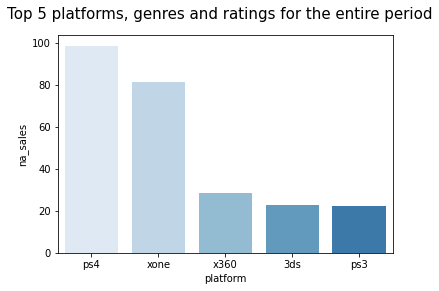

,genre,na_sales
0,shooter,75.10
1,action,64.87
2,sports,45.41
3,role-playing,30.46
4,misc,11.19


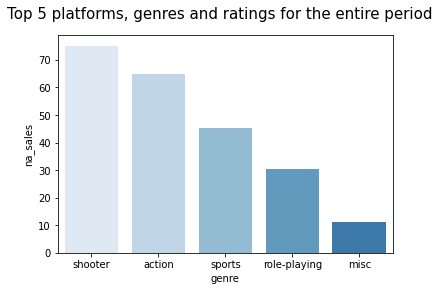

,rating,na_sales
0,M,90.82
1,without rating,59.98
2,E,42.38
3,T,34.41
4,E10+,25.28


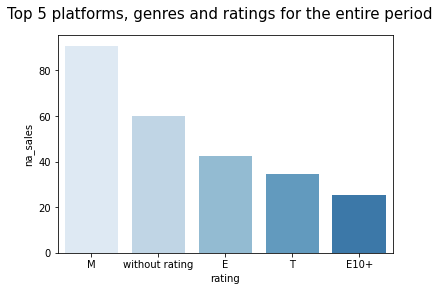

,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,3ds,16.12
4,x360,15.49


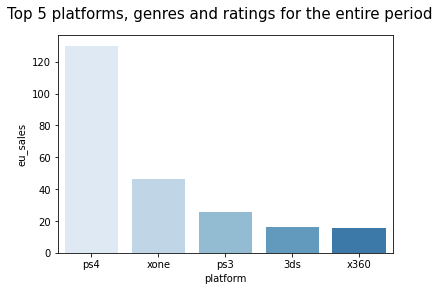

,genre,eu_sales
0,action,65.79
1,shooter,60.59
2,sports,43.88
3,role-playing,24.44
4,racing,11.36


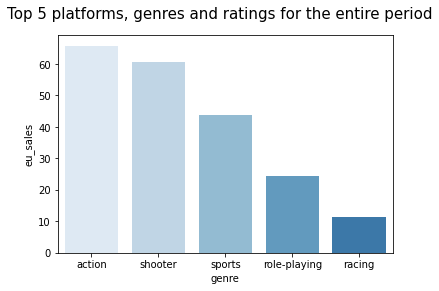

,rating,eu_sales
0,M,85.02
1,without rating,52.76
2,E,49.46
3,T,28.08
4,E10+,18.12


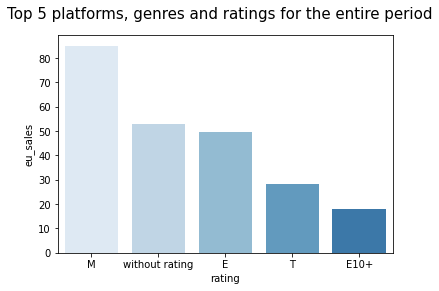

,platform,jp_sales
0,3ds,44.24
1,ps4,15.02
2,ps3,11.22
3,xone,0.32
4,x360,0.08


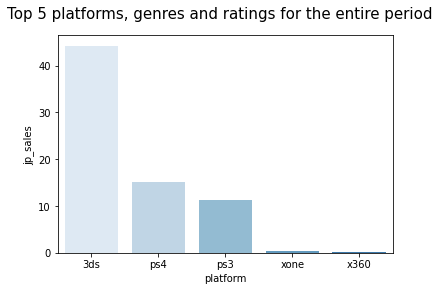

,genre,jp_sales
0,role-playing,26.21
1,action,23.79
2,fighting,4.93
3,shooter,3.33
4,misc,2.90


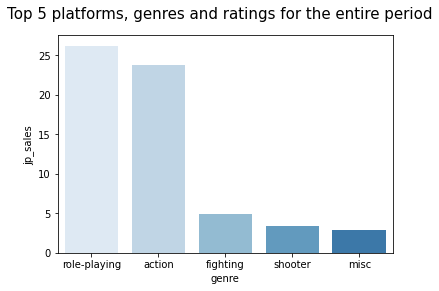

,rating,jp_sales
0,without rating,45.65
1,T,10.36
2,M,7.03
3,E,5.47
4,E10+,2.37


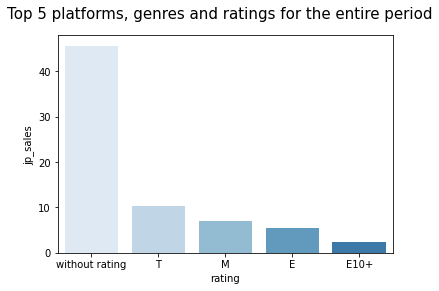

,platform,other_sales
0,ps4,44.48
1,xone,12.52
2,ps3,9.37
3,x360,4.35
4,3ds,3.68


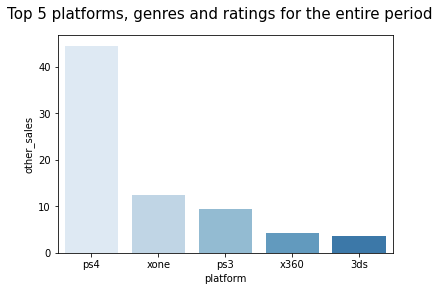

,genre,other_sales
0,action,20.72
1,shooter,20.66
2,sports,14.05
3,role-playing,7.84
4,misc,3.08


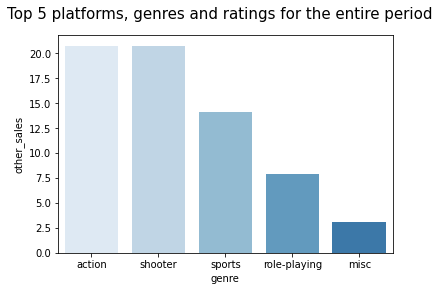

,rating,other_sales
0,M,27.22
1,without rating,17.20
2,E,13.75
3,T,10.12
4,E10+,6.11


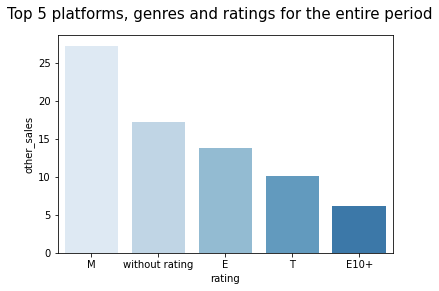

In [23]:
for region in ['na_sales','eu_sales','jp_sales','other_sales']:
    for i in ['platform','genre','rating']:
        t = slicee.pivot_table(index=[i],values=region,aggfunc='sum')\
                .sort_values(by=region,ascending=False)\
                .head(5)\
                .reset_index()
        display(t)
        print('\n')

        sb.set_palette("Blues")
        sb.barplot(data=t, x=i, y=region)
        plt.suptitle('Top 5 platforms, genres and ratings for the entire period', fontsize=15)
        plt.show()
  

# Step 5. Hypothesis testing

- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres `"Action"` and `"Sports"` are different.

**We formulate null hypotheses:**

`Null Hypothesis H₀`: The average user ratings of the Xbox One and PC platforms are the same;

`Alternative Hypothesis H₁`: Average User Ratings for Xbox One and PC Platforms Differ

**Conclusion:** 

The p-value is just under 4%. Thus it was not possible to disprove the Null hypothesis. That is with a probability of 4% you can get the difference in the ratings of the two platforms

- The generally accepted threshold values are -5% and 1% The final decision on which threshold to consider is sufficient at all times but remains with the analyst;
- `equal_var=False` because the variances of the two samples are not equal;
- I take up-to-date data from 2014 to 2016;
- I remove missings.

In [24]:
# Save the appropriate data in xbox_hyp and pc_hyp variables
# (recent data for the last 10 years)
xone_hyp = data[(data['platform']=='xone') & (data['year_of_release'] >= 2014)\
                & (data['year_of_release'] <= 2016)]['user_score']
pc_hyp = data[(data['platform']=='pc') & (data['year_of_release'] >= 2014)\
                & (data['year_of_release'] <= 2016)]['user_score']

# drop NaN's
xone_hyp = xone_hyp.dropna()
pc_hyp = pc_hyp.dropna()

# average user rating for xbox platforms
print('average user rating for xbox',xone_hyp.mean())
# average user rating for PC platforms
print('average user rating for PC',pc_hyp.mean())

average user rating for xbox 6.594545454545456
average user rating for PC 6.316260162601626


In [25]:
# check the variance of the samples
print(np.var(xone_hyp))
print(np.var(pc_hyp))

1.8795460055096425
2.8930689404455023


In [26]:
# test the hypothesis. use the ttest_ind method

alpha = 0.01

results = st.ttest_ind(xone_hyp, pc_hyp, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 0.139237120435483
Failed to reject the null hypothesis


**We formulate null hypotheses:**

`Null Hypothesis H₀`: The average user ratings of the Action and Sports genres are the same

`Alternative hypothesis H₁`: Average user ratings of Action and Sports genres differ

**Conclusion:**

Having received the p-value we rejected the null hypothesis. Thus we have almost no chance of getting the same average ratings for the two genres.

In [27]:
# Save the corresponding data with user ratings in the genre_action_hyp and genre_sports_hyp variables
genre_action_hyp = data[(data['genre']=='action') & (data['year_of_release'] >= 2014)\
                        & (data['year_of_release'] <= 2016)]['user_score']
genre_sports_hyp = data[(data['genre']=='sports') & (data['year_of_release'] >= 2014)\
                        & (data['year_of_release'] <= 2016)]['user_score']

# drop NaN's
genre_action_hyp = genre_action_hyp.dropna()
genre_sports_hyp = genre_sports_hyp.dropna()

# average rating for action genre
print('average rating for action genre',genre_action_hyp.mean())
# average rating for sport genre
print('average rating for sport genre',genre_sports_hyp.mean())

average rating for action genre 6.766442953020134
average rating for sport genre 5.2251968503937


In [28]:
# sampling variance test
print(np.var(genre_action_hyp))
print(np.var(genre_sports_hyp))

1.895853790369803
3.4198375596751185


In [29]:
# hypothesis testing. use the ttest_ind method

alpha = 0.01

results = st.ttest_ind(genre_action_hyp, genre_sports_hyp, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 9.658176026869598e-15
Rejecting the null hypothesis


**Conclusion**:

- Hypothesis: "The average user ratings of the Xbox one and PC platforms are the same." The null hypothesis could not be disproven.

- Hypothesis: "Average user ratings for the Action and Sports genres are different." We reject the null hypothesis.

# Step 6. General Conclusion

- Before analysis data preparation was carried out.
- Fixed data types in dataframe.
- Column names and their data are reduced to lower case.
- It is determined that the abbreviation TBD means to be determined to be done. The data was left blank on purpose. Therefore we replaced tbd with nan for further analysis.

- After analyzing we found that the number of games on game consoles and computers began to grow at a high rate from the 90s to 2008. Since 2008 after the mass creation of mobile applications and mobile games there has been a sharp decline in the development of console games.

- The current period was chosen from 2014 to 2016.
- The most relevant platforms for the entire period: 'ps2','x360','ps3','wii','ds','ps'
- Most popular platforms for the current period: xone, wiiu, PS4, PS3, Xbox 360
- It has also been found that the average life expectancy of a game console is about 10 years. The peak of sales comes about 5 years after the release of the console.

- Based on the analysis we saw that the Nintendo WII had a sharp jump in 2009 and the same sharp dip. Most likely because people did not have much interest in the console, when there was always a smartphone at hand.
- After analyzing the ratings of users and critics, it was found that the ratings of critics and users have a weak relationship with game sales. However, the higher the rating of critics or users the better the sale of the game.
- that the most popular genre of all time is Action. Last in strategy

Based on all the data an assumption was made that it is best to sell games for consoles such as the Sony Playstation 4
You need to choose a genre shooter and choose games with an "M" rating then sales will be much higher than if you sell other games.